<a href="https://colab.research.google.com/github/poverty149/Speech-Emotion-Recognition/blob/main/emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Processing

In [9]:
#Importing Libraries
import numpy as np 
import pandas as pd 
import os 
import librosa 
import wave 
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 

import keras 
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.models import Sequential 
from keras.layers import * 
from tensorflow.keras.optimizers import RMSprop 

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [12]:
!unzip -u "/content/drive/My Drive/archive.zip" -d "/content/NewFolder"

Archive:  /content/drive/My Drive/archive.zip


In [13]:
%cd /content

/content


In [14]:
def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    
    y, sr = librosa.load(wav_file_name,duration=3
                                  ,offset=0.5)
    #set n_mfcc = 40
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [15]:
##### load full radvess speech dataset #####
radvess_speech_labels = [] # to save extracted label/file
ravdess_speech_data = [] # to save extracted features/file

for dirname, _, filenames in os.walk('NewFolder/'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        radvess_speech_labels.append(int(filename[7:8]) - 1) # the index 7 and 8 of the file name represent the emotion label
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) # extract MFCC features/file
        
print("Finish Loading the Dataset.")

Finish Loading the Dataset.


In [16]:
#### convert data and label to array
ravdess_speech_data_array = np.asarray(ravdess_speech_data) # convert the input to an array
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape # get tuple of array dimensions

#### make categorical labels
labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
ravdess_speech_data_array.shape
labels_categorical.shape
print(ravdess_speech_label_array.shape, ravdess_speech_data_array.shape, labels_categorical.shape)

(2880,) (2880, 40) (2880, 8)


In [17]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

## Model Training

In [18]:
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=22, epsilon=1e-08, hidden_layer_sizes=(150,), learning_rate='adaptive', max_iter=400)

In [19]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=22, hidden_layer_sizes=(150,),
              learning_rate='adaptive', max_iter=400)

In [20]:
# Predict for the test set
y_pred=model.predict(x_test)

In [21]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 60.59%


In [22]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.6)
validation_samples = int(number_of_samples * 0.4)
test_samples = int(number_of_samples * 0.01)

In [23]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.3))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [24]:
### train using LSTM model
##import os
os.environ['KMP_WARNINGS'] = 'off'
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(x_train,-1), y_train, validation_data=(np.expand_dims(x_test, -1), y_test),
                      epochs=150, batch_size = 32)

Epoch 1/150
72/72 [==============================] - 6s 51ms/step - loss: 2.0559 - accuracy: 0.1589 - val_loss: 2.0367 - val_accuracy: 0.1632
Epoch 2/150
72/72 [==============================] - 3s 41ms/step - loss: 1.9992 - accuracy: 0.2066 - val_loss: 1.9558 - val_accuracy: 0.2569
Epoch 3/150
72/72 [==============================] - 3s 41ms/step - loss: 1.9422 - accuracy: 0.2426 - val_loss: 1.9144 - val_accuracy: 0.2378
Epoch 4/150
72/72 [==============================] - 3s 41ms/step - loss: 1.8878 - accuracy: 0.2700 - val_loss: 1.9175 - val_accuracy: 0.2552
Epoch 5/150
72/72 [==============================] - 3s 41ms/step - loss: 1.8567 - accuracy: 0.2869 - val_loss: 1.8710 - val_accuracy: 0.2639
Epoch 6/150
72/72 [==============================] - 3s 41ms/step - loss: 1.7989 - accuracy: 0.3203 - val_loss: 1.8506 - val_accuracy: 0.2639
Epoch 7/150
72/72 [==============================] - 3s 41ms/step - loss: 1.8029 - accuracy: 0.3125 - val_loss: 1.8316 - val_accuracy: 0.2639
Epoch 

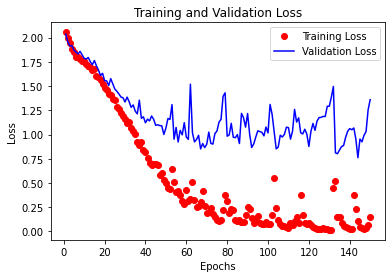

In [25]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

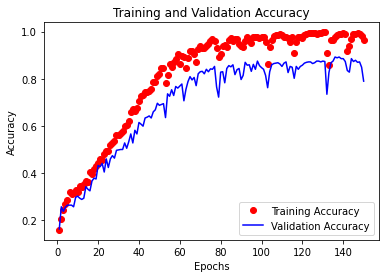

In [26]:
### accuracy plots using LSTM model
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [27]:
model_A.save_weights("Model_LSTM.h5")

In [28]:
np.expand_dims(x_train,-1).shape

(2304, 40, 1)

## Audio Recording


In [29]:
# all imports
from io import BytesIO
from base64 import b64decode
from google.colab import output
from IPython.display import Javascript

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  print("Speak Now...")
  display(Javascript(RECORD))
  sec += 1
  s = output.eval_js('record(%d)' % (sec*1000))
  print("Done Recording !")
  b = b64decode(s.split(',')[1])
  
  with open('audio1.wav','wb') as f:
    f.write(b)
  return 'audio1.wav'  # or webm ?

In [44]:
voice=record(10)

Speak Now...


<IPython.core.display.Javascript object>

Done Recording !


In [ ]:
voice

In [ ]:
type(voice)

## Testing Model with new Data

In [45]:
data=[]
data.append(extract_mfcc('audio1.wav'))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [46]:
data

[array([-5.0392035e+02,  1.1070257e+02, -1.0957775e+01,  1.3921569e+01,
         6.3671994e-01, -1.5734009e+01,  8.2365685e+00, -1.1139078e+01,
         3.3706553e+00, -8.5909061e+00, -4.1131797e+00,  4.4639359e+00,
         6.4041114e-01,  3.3273101e+00, -4.6976290e+00, -2.5321560e+00,
        -5.1349363e+00,  1.7180345e+00, -1.1671022e+01,  3.8867300e+00,
        -8.2945518e+00,  3.4498067e+00,  8.2090735e-01,  5.3111715e+00,
        -1.5145059e-01,  2.0355778e+00, -4.8285418e+00, -2.8776033e+00,
        -1.3195167e+00, -1.8034600e+00, -6.3534327e+00, -3.0588732e+00,
        -2.9063013e+00,  1.6535190e+00, -6.2488298e+00, -8.8641465e-01,
        -8.9610654e-01,  1.3786274e+00, -6.3886127e+00, -5.2998030e-01],
       dtype=float32)]

In [47]:
y=model.predict(data)

In [42]:
def get_label(x): 
  data=x[0]
  if(data[0]==1):
    print("neutral")
  if(data[1]==1):
    print("calm")
  if(data[2]==1):
    print("happy")
  if(data[3]==1):
    print("sad")
  if(data[4]==1):
    print("angry")
  if(data[5]==1):
    print("fearful")
  if(data[6]==1):
    print("disgust")
  if(data[7]==1):
    print("surprised")

In [48]:
y

array([[0, 0, 0, 0, 1, 0, 0, 0]])

In [41]:
y[0][0]

0

In [49]:
get_label(y)

angry


In [ ]:
reconstructed_model = keras.models.load_model("Model_LSTM.h5")

# Let's check:
np.testing.assert_allclose(
    model.predict(test_input), reconstructed_model.predict(test_input)
)

# The reconstructed model is already compiled and has retained the optimizer
# state, so training can resume:
reconstructed_model.fit(test_input, test_target)